In [1]:
import pandas as pd

In [2]:
# grab our world in data data and see what is available
data = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [3]:
# filter data by iso_code so we can compare them
iso_codes = ['USA', 'ITA', 'SWE', 'GBR', 'FRA', 'DEU', 'ESP', 'KOR', 'CHN', 'CAN']

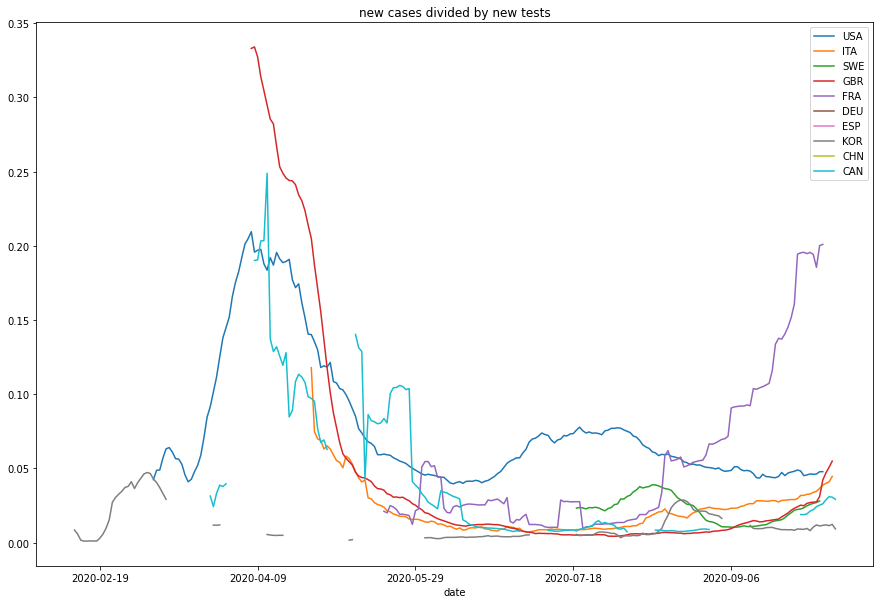

In [4]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = (filtered_data['new_cases']/filtered_data['new_tests']).rolling(window=7).mean()
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.plot(figsize=(15,10), title='new cases divided by new tests')

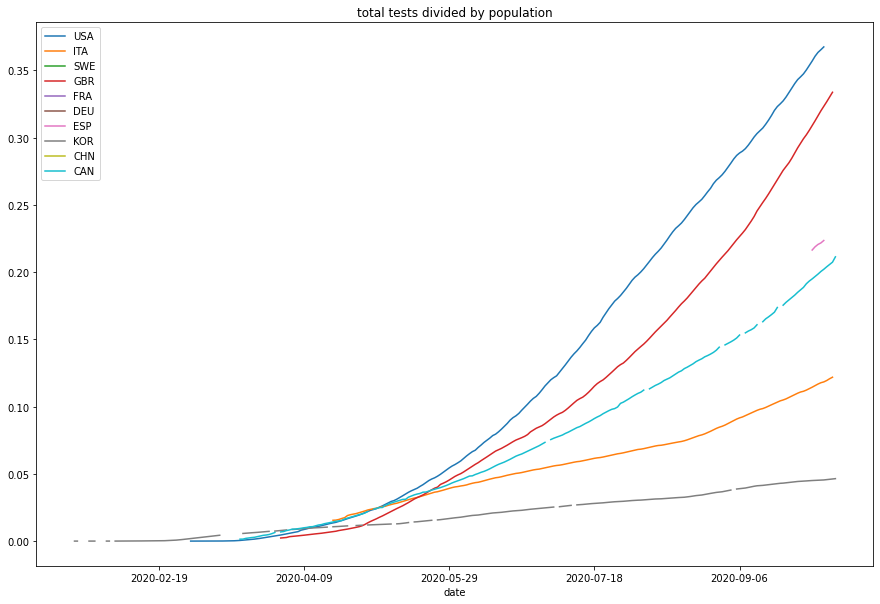

In [5]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = filtered_data['total_tests']/filtered_data['population']
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.plot(figsize=(15,10), title='total tests divided by population')

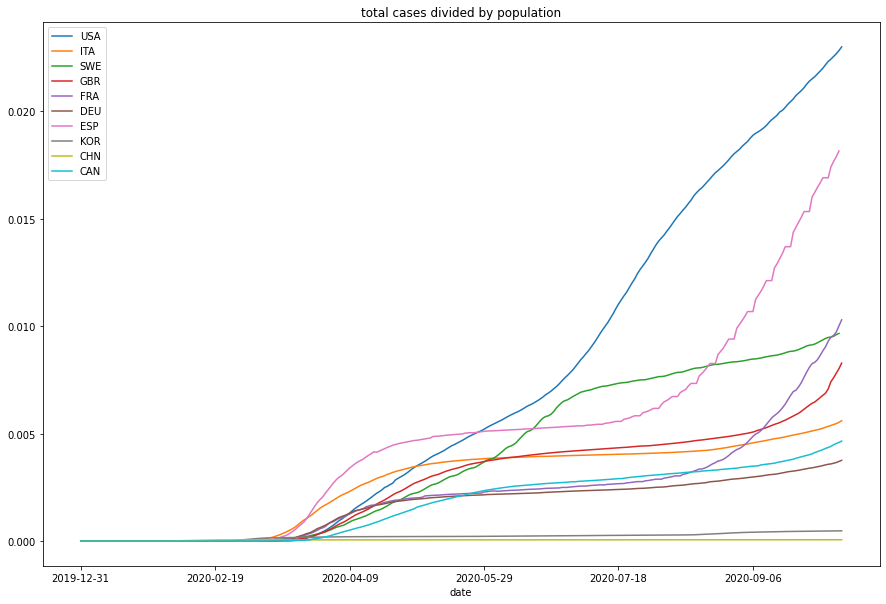

In [6]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = filtered_data['total_cases']/filtered_data['population']
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.plot(figsize=(15,10), title='total cases divided by population')

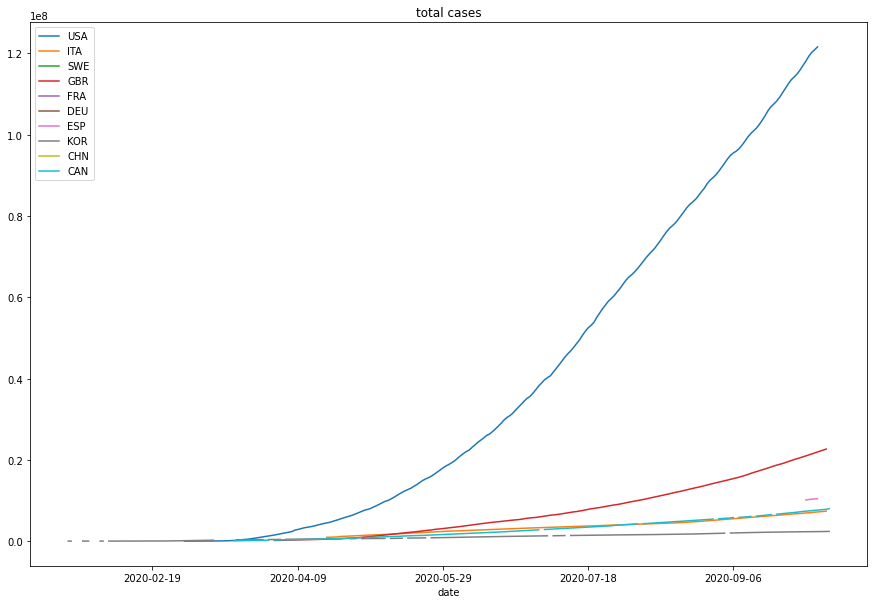

In [7]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = filtered_data['total_tests']
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.plot(figsize=(15,10), title='total cases')

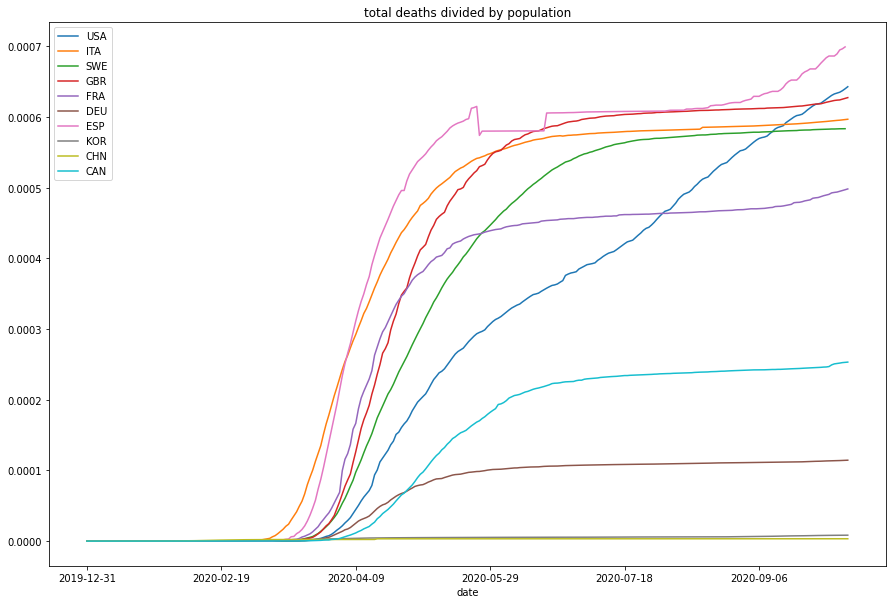

In [8]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = filtered_data['total_deaths']/filtered_data['population']
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.plot(figsize=(15,10), title='total deaths divided by population')

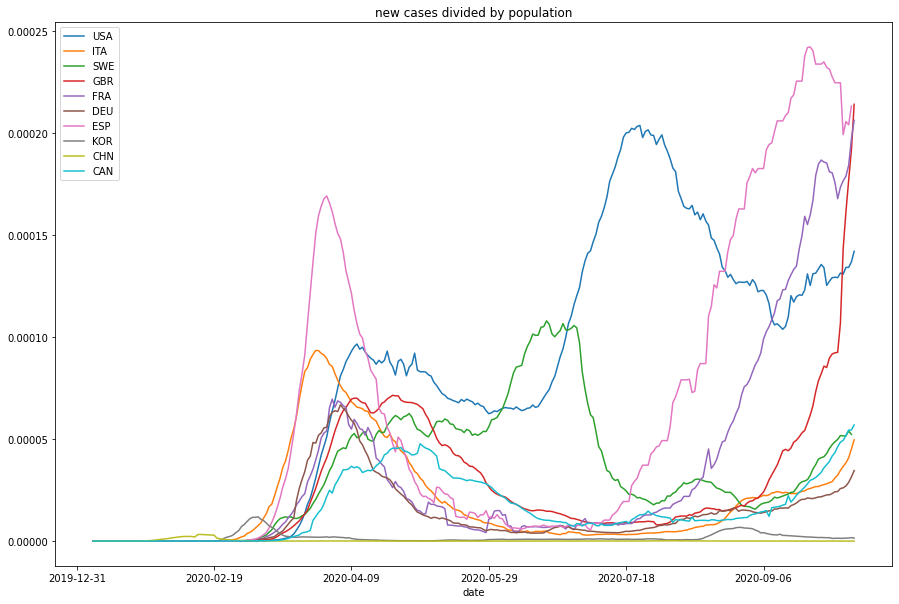

In [9]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = (filtered_data['new_cases']/filtered_data['population']).rolling(window=7).mean()
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.plot(figsize=(15,10), title='new cases divided by population')

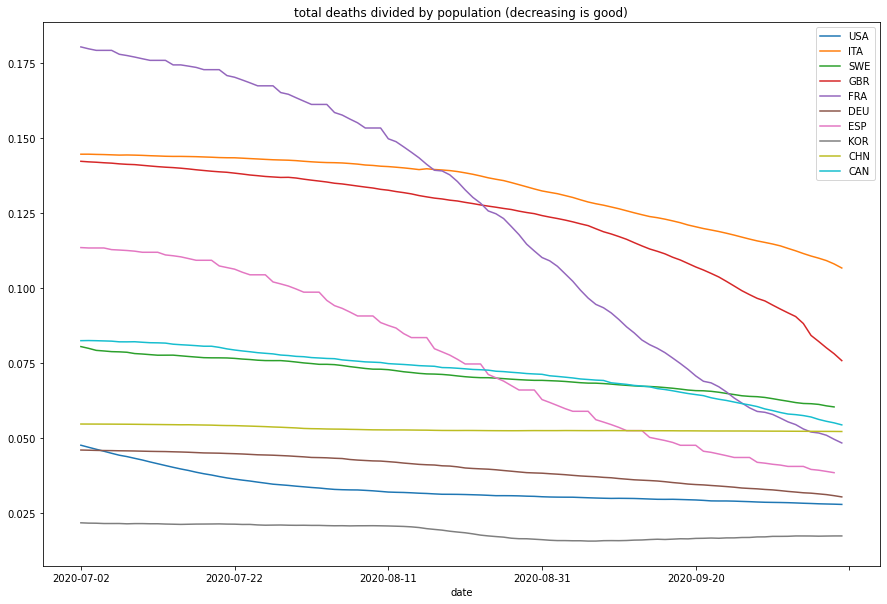

In [10]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = filtered_data['total_deaths']/filtered_data['total_cases']
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.tail(100).plot(figsize=(15,10), title='total deaths divided by population (decreasing is good)')

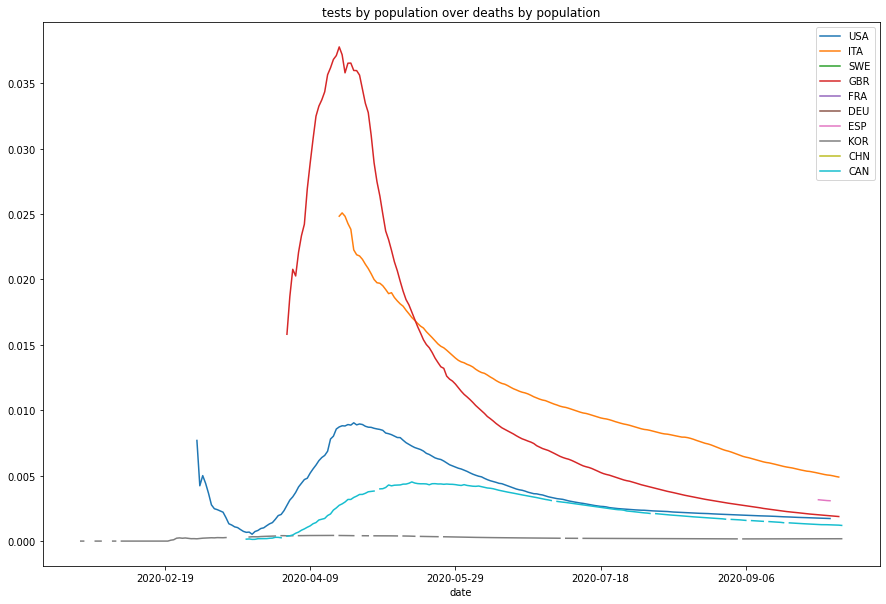

In [12]:
plot_df = pd.DataFrame()

for country in iso_codes:
    filtered_data = data[(data.iso_code == country)]
    filtered_data = filtered_data.set_index('date')
    filtered_data[country] = ((filtered_data['total_deaths']/filtered_data['population'])/(filtered_data['total_tests']/filtered_data['population']))
    filtered_data = filtered_data[[country]]
    if len(plot_df) == 0:
        plot_df = filtered_data
    else:
        plot_df = pd.concat([plot_df, filtered_data], axis=1)
    
plot_df.plot(figsize=(15,10), title='tests by population over deaths by population')